Importando bibliotecas

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

Lendo o arquivo de dados antes de limpeza

In [211]:
#importação de arquivo com dados para DataFrame
data = pd.read_csv('data/attacks.csv', engine='python')

In [212]:
#criacao de backup para eventuais erros
df = data

In [213]:
#Tipos de dados por coluna e a existencia de nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [214]:
#Tamanho do DataFrame antes da limpeza
df.shape

(25723, 24)

In [215]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [216]:
#Verifiando a quantidade de nulos por coluna antes de limpeza
df.isnull().sum()

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [217]:
#Nome das colunas
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [218]:
#retirando os espacos dos nomes das colunas
df.columns = df.columns.str.strip()

In [219]:
#retirando colunas que nao servirão para análise
#números de nulos praticamente semelhante ao numero de linhas, nao possui informacoes importantes.
df = df.drop(['Activity','Case Number','Area', 'Location','Name','Injury', 'Species', 'Investigator or Source', 'pdf','href formula', 'href','Case Number.1','Case Number.2','original order','Unnamed: 22','Unnamed: 23'], axis=1)

In [220]:
#elimina as linhas que todos os elementos são nulos
df = df.dropna(axis=0, how='all')

In [221]:
#Retirando todos os valores diferentes do padrão dd-mmm-aaaa
df['Date'] = df['Date'].str.extract(r'(\d{2}-\w{3}-\d{4})')

In [222]:
#Retirando valores nulos que ficaram
df.dropna(subset=['Date'], inplace=True)

In [223]:
#Retirando valores nulos que ficaram
df.dropna(subset=['Year'], inplace=True)

In [224]:
#Alterando para int. Incluir dados a partir de 1900 no momento da análise
#df['Year'].unique()
df.astype({'Year': 'int64'}).dtypes

Date           object
Year            int64
Type           object
Country        object
Sex            object
Age            object
Fatal (Y/N)    object
Time           object
dtype: object

In [225]:
#removendo dados muito antigos e deixando a partir de 1900
df_remove = df.loc[(df['Year'] < 1900)]
df = df.drop(df_remove.index)

In [226]:
#'Sea Disaster,'Boating','Boatomg','Boat' alterar estes para um unico modelo ('Boating'), e retirar os nulos
df['Type'].unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', nan, 'Boat', 'Boatomg'], dtype=object)

In [227]:
#Retirando os nulos
df.dropna(subset=['Type'], inplace=True)

In [228]:
#Fazendo as substituicoes
df.Type=df.Type.replace({'Sea Disaster': 'Boating','Boat': 'Boating','Boatomg': 'Boating'})

In [229]:
#Verificando os nulos após alteração
df.isnull().sum()

Date              0
Year              0
Type              0
Country          11
Sex             390
Age            1709
Fatal (Y/N)     403
Time           2149
dtype: int64

In [230]:
#verificando os dados da coluna
df['Country'].unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', nan, 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SOLOMON ISLANDS', 'JAPAN', 'EGYPT',
       'ST HELENA, British overseas territory', 'COMOROS', 'REUNION',
       'UNITED KINGDOM', 'UNITED ARAB EMIRATES', 'PHILIPPINES',
       'INDONESIA', 'FRENCH POLYNESIA', 'CHINA', 'COLUMBIA', 'CAPE VERDE',
       'Fiji', 'DOMINICAN REPUBLIC', 'CAYMAN ISLANDS', 'ARUBA',
       'MOZAMBIQUE', 'PUERTO RICO', 'ITALY', 'ATLANTIC OCEAN', 'GREECE',
       'ST. MARTIN', 'FRANCE', 'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO',
       'KIRIBATI', 'ISRAEL', 'DIEGO GARCIA', 'TAIWAN', 'JAMAICA',
       'PALESTINIAN TERRITORIES', 'GUAM', 'SEYCHELLES', 'BELIZE',
       'NIGERIA', 'TONGA', 'SCOTLAND', 'CANADA', 'CROATIA', 'FIJI',
       'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA', 'RUSSIA',
       'TURKS & CAICOS', 'UNITED ARAB EM

In [231]:
#Retirando os nulos
df.dropna(subset=['Country'], inplace=True)

In [232]:
#Retirando os espacos e deixando todas letras maiusculas
df.Country = df.Country.str.strip()
df.Country = df.Country.str.upper()

In [233]:
#Retirar espacos, nulos e informacoes diferentes de F ou M
df['Sex'].unique()

array(['F', 'M', nan, 'M ', 'lli', 'N', '.'], dtype=object)

In [234]:
#Fazendo as alterações, deixando as strings invalidas para 
df.Sex =df.Sex .replace({'M ': 'M','lli': 1,'N': 1, '.': 1})

In [235]:
df['Sex'] = df['Sex'].str.extract(r'(\w*)')

In [236]:
df.dropna(subset=['Sex'], inplace=True)

In [238]:
df['Sex'].value_counts()

M    3950
F     548
Name: Sex, dtype: int64

In [239]:
#retirar espacos, nulos, caracteres, strings
df['Age'].unique()

array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '21',
       '30', '60', '33', '29', '54', '34', '41', '37', '56', '19', '25',
       '38', '55', '35', '46', '45', '14', '40s', '28', '20', '24', '26',
       '49', '22', '7', '31', '17', '40', '13', '42', '3', '69', '8',
       '50', '16', '82', '73', '20s', '68', '51', '39', '58', 'Teen',
       '47', '61', '65', '36', '66', '43', '60s', '9', '72', '59', '6',
       '27', '64', '23', '71', '44', '62', '63', '70', '18 months', '53',
       '30s', '50s', 'teen', '77', '74', '28 & 26', '5', '86', '18 or 20',
       '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', '8 or 10', '84',
       '\xa0 ', ' ', '30 or 36', '6½', '21 & ?', '75', '33 or 37',
       'mid-30s', '23 & 20', ' 30', '7      &    31', ' 28', '20?',
       '32 & 30', '16 to 18', '87', '67', 'Elderly', 'mid-20s', '74 ',
       '45 ', '21 or 26', '20 ', '>50', '18 to 22', 'adult', '? & 19',
       '(adult)', '33 & 37', '25 or 28', '37, 67, 35, 27,  ? & 27',
    

In [240]:
#Trocando as informacoes 
df.Age = df.Age.replace({'60s':'60', '18 months':'1','30s':'30','40s':'40', '50s':'50', '28 & 26':'27', '18 or 20': '19',
       '12 or 13':'13', '46 & 34':'46', '28, 23 & 30': '28', '8 or 10':'9',
       '\xa0 ':'18', ' ':'18', '30 or 36':'33', '6½':'6', '21 & ?':'21', '33 or 37':'34',
       'mid-30s':'30', '23 & 20':'23', '7      &    31':'31','Teen':'10','teen':'10','Teens':'10', ' 28':'28', '20?':'20',
       '32 & 30':'30', '16 to 18':'18', 'Elderly':'70', 'mid-20s':'20', '74 ':'74',
       '45 ':'45', '21 or 26':'24', '20 ':'20', '>50':'51', '18 to 22':'20', 'adult':'25', '? & 19':'19',
       '(adult)':'25', '33 & 37':'34', '25 or 28':'26', '37, 67, 35, 27,  ? & 27':'35',
       '21, 34,24 & 35':'35', '30 & 32':'31', '17 & 35':'28', 'X':'10', '13 or 18':'16', '33 & 26':'25',
       ' 43':'43', '"young"':'16', 'F':'18', 'Both 11':'11', '9 or 10':'10', 'young':'16',
       '36 & 23':'30', '  ':'18', 'A.M.':'18', '?    &   14':'14','20s':'20', '10 or 12':'11',' 30':'30',
       '31 or 33':'32', '2½':'2', '1':'1'})

In [241]:
df['Age'].unique()

array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '21',
       '30', '60', '33', '29', '54', '34', '41', '37', '56', '19', '25',
       '38', '55', '35', '46', '45', '14', '40', '28', '20', '24', '26',
       '49', '22', '7', '31', '17', '13', '42', '3', '69', '8', '50',
       '16', '82', '73', '68', '51', '39', '58', '47', '61', '65', '36',
       '66', '43', '9', '72', '59', '6', '27', '64', '23', '71', '44',
       '62', '63', '70', '1', '53', '77', '74', '5', '86', '84', '75',
       '87', '67', '81', '78'], dtype=object)

In [242]:
df.astype({'Age': 'float64'}).dtypes

Date            object
Year           float64
Type            object
Country         object
Sex             object
Age            float64
Fatal (Y/N)     object
Time            object
dtype: object

In [243]:
#Alterando informacoes nulas de idade, por nao informado
df.update(df['Age'].fillna("Não informada"))

In [244]:
df['Age'].value_counts()

Não informada    1347
18                140
17                139
20                138
16                131
                 ... 
82                  1
87                  1
1                   1
86                  1
81                  1
Name: Age, Length: 81, dtype: int64

In [245]:
df.isnull().sum()

Date              0
Year              0
Type              0
Country           0
Sex               0
Age               0
Fatal (Y/N)     345
Time           1846
dtype: int64

In [246]:
#exluir espacos, deixar todos maiusculos para leitura,  e retirar valores invalidos.
df['Fatal (Y/N)'].unique()

array(['N', 'Y', nan, 'M', 'UNKNOWN', '2017', ' N'], dtype=object)

In [247]:
df['Fatal (Y/N)'] =df['Fatal (Y/N)'].replace({'M ': 'N', 'UNKNOWN': 1,'2017': 1, ' N': 'N','M': 'N'})

In [248]:
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].str.extract(r'(\w*)')

In [249]:
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].fillna("N")

In [250]:
df['Fatal (Y/N)'].unique()

array(['N', 'Y'], dtype=object)

In [251]:
df['Fatal (Y/N)'].value_counts()

N    3709
Y     789
Name: Fatal (Y/N), dtype: int64

In [252]:
#verificando quantas NaN ainda existem em cada coluna.
df.isnull().sum()

Date              0
Year              0
Type              0
Country           0
Sex               0
Age               0
Fatal (Y/N)       0
Time           1846
dtype: int64

In [253]:
#verificando as informacoes referente ao horario de ataque
df['Time'].sort_values().unique()

array([' ', ' 14h00', '"After dark"', '"Early evening"', '"Evening"',
       '"Just before 11h00"', '"Night"', '"shortly before dusk"', '--',
       '00h30', '01h00', '02h00', '02h30', '02h45', '03h00', '03h30',
       '04h00', '0500', '05h00', '05h30', '05h40', '05h45', '06h00',
       '06h10', '06h15', '06h30', '06h45', '06h47', '06h50', '06j00',
       '07h00', '07h05', '07h08', '07h10', '07h15', '07h19', '07h20',
       '07h30', '07h40', '07h45', '07h50', '07h56', '0830', '08h00',
       '08h00 / 09h30', '08h05', '08h10', '08h15', '08h20', '08h30',
       '08h35', '08h40', '08h45', '08h50', '08h55', '08h57', '08h58',
       '09h00', '09h00 - 09h30', '09h00 -10h00', '09h05', '09h11',
       '09h15', '09h20', '09h30', '09h30 ', '09h30 / 10h00',
       '09h30 / 15h30', '09h35', '09h40', '09h45', '09h50', '09h55',
       '09h57', '10h00', '10h00 -- 11h00', '10h00 / 11h00',
       '10h00 or 14h00', '10h07', '10h10', '10h15', '10h16', '10h20',
       '10h22', '10h25', '10h27', '10h28', '

In [254]:
#convertendo para string
df.Time=df.Time.apply(str)

In [255]:
#alterando os horarios para períodos do dia
df.loc[df["Time"].str.startswith("00"),"Time"] = "Madrugada"
df.loc[df["Time"].str.startswith("01"),"Time"] = "Madrugada"
df.loc[df["Time"].str.startswith("02"),"Time"] = "Madrugada"
df.loc[df["Time"].str.startswith("03"),"Time"] = "Madrugada"
df.loc[df["Time"].str.startswith("04"),"Time"] = "Madrugada"
df.loc[df["Time"].str.startswith("05"),"Time"] = "Madrugada"
df.loc[df["Time"].str.startswith("06"),"Time"] = "Manhã"
df.loc[df["Time"].str.startswith("07"),"Time"] = "Manhã"
df.loc[df["Time"].str.startswith("08"),"Time"] = "Manhã"
df.loc[df["Time"].str.startswith("09"),"Time"] = "Manhã"
df.loc[df["Time"].str.startswith("10"),"Time"] = "Manhã"
df.loc[df["Time"].str.startswith("11"),"Time"] = "Manhã"
df.loc[df["Time"].str.startswith("12"),"Time"] = "Manhã"
df.loc[df["Time"].str.startswith("13"),"Time"] = "Manhã"
df.loc[df["Time"].str.startswith("14"),"Time"] = "Tarde"
df.loc[df["Time"].str.startswith("15"),"Time"] = "Tarde"
df.loc[df["Time"].str.startswith("16"),"Time"] = "Tarde"
df.loc[df["Time"].str.startswith("17"),"Time"] = "Tarde"
df.loc[df["Time"].str.startswith("18"),"Time"] = "Tarde"
df.loc[df["Time"].str.startswith("19"),"Time"] = "Noite"
df.loc[df["Time"].str.startswith("2"),"Time"] = "Noite"

In [256]:
#verificando dados restantes para substituicao
df['Time'].sort_values().unique()

array([' ', ' 14h00', '"After dark"', '"Early evening"', '"Evening"',
       '"Just before 11h00"', '"Night"', '"shortly before dusk"', '--',
       '30 minutes after 1992.07.08.a', '8:04 pm', '9h00', '<07h30',
       '>06h45', '>08h00', '>12h00', '>14h30', '>17h00', 'A.M.', 'AM',
       'After 04h00', 'After Dusk', 'After midnight', 'After noon',
       'Afternoon', 'Before 07h00', 'Between 05h00 and 08h00',
       'Between 06h00 & 07h20', 'Dark', 'Dawn', 'Daybreak', 'Daytime',
       'Dusk', 'Early Morning', 'Early afternoon', 'Early morning',
       'Evening',
       'FATAL  (Wire netting installed at local beaches after this incident.)',
       'Just after 12h00', 'Just before dawn', 'Just before noon',
       'Just before sundown', 'Late afternon', 'Late afternoon',
       'Late morning', 'Lunchtime', 'Madrugada', 'Manhã', 'Mid afternoon',
       'Mid morning', 'Mid-morning', 'Midday', 'Midnight', 'Morning',
       'Morning ', 'Night', 'Nightfall', 'Noite', 'Noon', 'P.M.',
       

In [257]:
df.Time = df.Time.replace({
        ' ':"Manhã",
        '   ':"Manhã",
        ' 14h00':"Tarde",
        '"After dark"':"Noite",
        '"Early evening"':"Noite",
        '"Evening"':"Tarde",
        '"Just before 11h00"':"Manhã", '"Night"':"Noite",
       '"shortly before dusk"':"Tarde", '--':"Manhã", '30 minutes after 1992.07.08.a':"Noite",
       '8:04 pm':"Noite", '9h00':"Manhã", '<07h30':"Manhã", '>06h45':"Manhã", '>08h00':"Manhã", '>12h00':"Manhã",
       '>14h30':"Tarde", '>17h00':"Tarde", 'A.M.':"Manhã", 'AM':"Manhã", 'After 04h00':"Madrugada", 'After Dusk':"Madrugada",
       'After midnight':"Madrugada", 'After noon':"Tarde", 'Afternoon':"Tarde", 'Before 07h00':"Manhã",
       'Before 10h30':"Manhã", 'Before daybreak':"Madrugada", 'Between 05h00 and 08h00':"Manhã",
       'Between 06h00 & 07h20':"Manhã", 'Dark':"Madrugada", 'Dawn':"Manhã", 'Daybreak':"Manhã", 'Daytime':"Manhã",
       'Dusk':"Manhã", 'Early Morning':"Manhã", 'Early afternoon':"Tarde", 'Early morning':"Manhã",
       'Evening':"Tarde",
       'FATAL  (Wire netting installed at local beaches after this incident.)':"Manhã",
       'Just after 12h00':"Tarde", 'Just before dawn':"Madrugada", 'Just before noon':"Manhã",
       'Just before sundown':"Madrugada", 'Late Afternoon':"Tarde", 'Late afternon':"Tarde",
       'Late afternoon':"Tarde", 'Late morning':"Manhã", 'Lunchtime':"Tarde",'Mid afternoon':"Tarde", 'Mid morning':"Manhã", 'Mid-morning':"Manhã", 'Midday':"Manhã",
       'Midnight':"Noite", 'Morning':"Manhã", 'Morning ':"Manhã", 'Night':"Noite", 'Nightfall':"Noite",'Noon':"Manhã", 'P.M.':"Tarde", 'Possibly same incident as 2000.08.21':"Tarde",
       'Prior to 10h37':"Manhã", 'Ship aban-doned at 03h10':"Madrugada",
       'Shortly after midnight':"Madrugada", 'Shortly before 12h00':"Tarde",
       'Shortly before 13h00':"Tarde", 'Sometime between 06h00 & 08hoo':"Manhã", 'Sunset':"Tarde",
       'X':"Manhã", 'dusk':"Manhã", 'nan':"Manhã", 'night':"Noite", '\xa0 ':"Manhã"})
    

In [258]:
#verificando valores apos alteracao
df['Time'].sort_values().unique()

array(['Madrugada', 'Manhã', 'Noite', 'Tarde'], dtype=object)

In [259]:
#verificando quantidade de cada um
df.Time.value_counts()

Manhã        3095
Tarde        1229
Noite         144
Madrugada      30
Name: Time, dtype: int64

In [260]:
#verificando tamanho apos limpeza
df.shape

(4498, 8)

In [261]:
df.head()

,Date,Year,Type,Country,Sex,Age,Fatal (Y/N),Time
0,25-Jun-2018,2018.0,Boating,USA,F,57,N,Tarde
1,18-Jun-2018,2018.0,Unprovoked,USA,F,11,N,Tarde
2,09-Jun-2018,2018.0,Invalid,USA,M,48,N,Manhã
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,M,Não informada,N,Manhã
4,04-Jun-2018,2018.0,Provoked,MEXICO,M,Não informada,N,Manhã


Dados por país

In [262]:
#Agora sem valores nulos vamos observar os valores por paises
top_five_country = df.Country.value_counts().sort_values(ascending = False).head(5)

In [263]:
#pegando os 20 paises com mais ocorrencias e separando
top_country = df.Country.value_counts().sort_values(ascending = False).head(20)

Text(0.5, 1.0, 'Countries with more records')

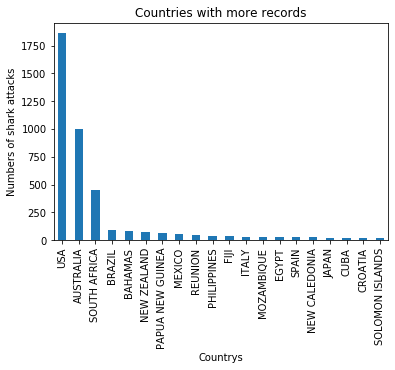

In [264]:
top_country.plot.bar()
plt.xlabel("Countrys")
plt.ylabel("Numbers of shark attacks")
plt.title("Countries with more records")

Dados por horario de ataque

In [265]:
df["Fatal"]= df["Fatal (Y/N)"].map({'Y': 1, 'N': 0})

In [266]:
df["Male"]= df["Sex"].map({'M': 1, 'F': 0})

In [267]:
df["Female"]= df["Sex"].map({'M': 0, 'F': 1})

In [268]:
attacks_gender = df.groupby(["Time"]).agg({"Male":"sum","Female":"sum","Fatal":"mean"}).sort_values(by="Fatal", ascending=False).head(4)

In [269]:
attacks_gender 

,Male,Female,Fatal
Time,,,
Madrugada,29,1,0.266667
Manhã,2751,344,0.183199
Noite,131,13,0.180556
Tarde,1039,190,0.152970


In [ ]:
Dados de ataque por ano

Text(0.5, 1.0, 'Attacks per year')

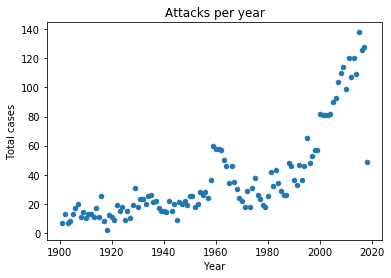

In [270]:
attacks_year= df.groupby('Year', as_index=False).count()
year_by_year = attacks_year[attacks_year['Year'] > 1900]
year_by_year.plot.scatter(x = 'Year', y = 'Date')
plt.xlabel("Year")
plt.ylabel("Total cases")
plt.title("Attacks per year")

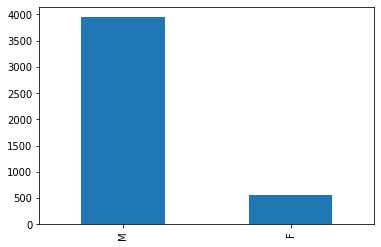

In [272]:
df['Sex'].value_counts().plot.bar()

In [273]:
df.to_csv("data/attacks_cleaning.csv")

In [ ]:
#As informacoes plotadas acima, serao separadas em novo arquivo para melhor visualizacao